In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Klasyfikacja

## Wstęp

### Klasyfikacja jako element uczenia nadzorowanego

Klasyfikacja należy do metod uczenia nadzorowanego (ang. supervised learning).  
  
Ideą uczenia nadzorowanego jest model otrzymujący atrybuty opisowe (dane wejściowe), którym musi przypisać atrybut decyzyjny (dane wyjściowe). Zakładamy, że pomiędzy danymi wejściowymi, a wyjściowymi zachodzi pewien związek przyczynowo-skutkowy, który pozwala wysnuć odpowiednie wnioski. Następnie wynik z modelu porównywany jest z wcześniej znanym poprawnym wynikiem. Na podstawie różnicy tych dwóch wartości model się uczy.

W uczeniu nadzorowanym wyróżniamy dwie podkategorie zależnie od tego czy wyniki są ze skończonego zbioru (klasyfikacja), czy ze zbioru nieskończonego (regresja).




![Machine learning taxonomy](https://media.licdn.com/dms/image/v2/C4D12AQH6M4UqfFDheA/article-cover_image-shrink_720_1280/article-cover_image-shrink_720_1280/0/1621975269895?e=1733961600&v=beta&t=nfMdZrVf-wTldSmX9s2cLa7YugrT9go4NOEUnPsygpw
"Machine learning taxonomy")

### Rola danych w klasyfikacji

#### Train/test split
By sprawdzić skuteczność modelu dla danego zadania klasyfikacji dokonywany jest podział zbioru danych na zbiór treningowy i testowy. Zbiór treningowy jest traktowany jako źródło wiedzy na podstawie którego model się uczy, natomiast zbiór testowy pozwala na ocenę poprawności/skuteczności modelu (przy zbiorze testowym model nie jest uczony).

#### Train/validation/test split
Wykorzystuje się też podział zbioru danych na treningowy, walidacyjny i testowy. Zbiór treningowy służy wtedy do uczenia modelu (tak jak w poprzednim przypadku), a na podstawie zbióru walidacyjnego dobieramy hiperparametry modelu (czyli np. learning rate). Gdy już dobierzemy hiperparametry dla których model uzyskuje najlepsze wyniki na zbiorze walidacyjnym, podajemy jakie wyniki uzyskuje na zbiorze treningowym.

![Data splits](https://cdn.prod.website-files.com/5d7b77b063a9066d83e1209c/61568656a13218cdde7f6166_training-data-validation-test.png "Data splits")

### Intuicja

Dobrą analogią są uczniowie, którzy rozwiązują prace domowe (trening na zbiorze uczącym), żeby uzyskać jak najlepszy wynik na egzaminie (wyniki na zbiorze testowym). Tak jak uczniowie, nie chcemy klasyfikatora, który zapamiętał "słowo w słowo" zbiór treningowy (zadania z pracy domowej), chcemy natomiast klasyfikator, który nauczył sie ogólnych zależności, pozwalających uzyskać dobre wyniki na zbiorze testowym (egzamin z podobnymi, ale innymi zadaniami niż w pracy domowej).

### Optymalizacja

Zadanie klasyfikacji polega na takim dobieraniu parametrów naszego modelu, by był on w stanie jak najlepiej klasyfikować dane, których nigdy wcześniej nie widział i na których się nie uczył.  

Zadanie klasyfikacji to minimalizuja funkcji:  
$\Large J(\Theta) = (\dfrac{1}{n}\sum_{i=0}^{n}\mathcal L(h(x_i;\Theta),y_i))+\lambda R(\Theta)$  
gdzie:
- $\Theta$ to paramtery modelu
- $x_i$ to atrybuty opisowe
- $y_i$ to atrybuty decyzyjne
- $h(x_i;\Theta)$ to model
- $L(h(x_i;\Theta), y_i)$ to funkcja straty (ang. loss)
- $\lambda$ to stała
- $R(\Theta)$ to element regularyzujący
- n to liczba elementów w zbiorze testowym  
  
Najprostsza funkcja straty $$L(h(x;\Theta), y)= 
\begin{cases} 
0 & \quad \text{jeśli $y=h(x;\Theta)$}\\ 
1 & \quad \text{w przeciwnym wypadku} 
\end{cases}$$

A po co nam regularyzacja?  
  
![Regularization](https://editor.analyticsvidhya.com/uploads/83837impact%20of%20req.png "Regularization")

### Rodzaje klasyfikacji

Klasyfikacja to mapowanie wektora cech "X" na zmienną "y" ze skończonego zbioru możliwych wartości "y". Jeśli "y" przyjmuje tylko dwie wartości (np. klasyfikator sprawdzający czy dany mail jest spamem), to mówimy o klasyfikacji binarnej. Jeśli wiele wartości, to mamy klasyfikację wieloklasową(np. klasyfikator mówiący czy na zdjęciu znajduje się kot, pies czy koń).

## Klasyfikacja binarna

### Regresja logistyczna (ang. logisitc regression)

Modyfikacja regresji liniowej, która zawsze zwraca prawdopodobieństwo z przedziału [0,1] poprzez zastosowanie funkcji sigmoidalnej.  
Wzór: $\large h(x;\theta,\theta_0)=\sigma(\theta^Tx+\theta_0)$

#### Sigmoida

In [2]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

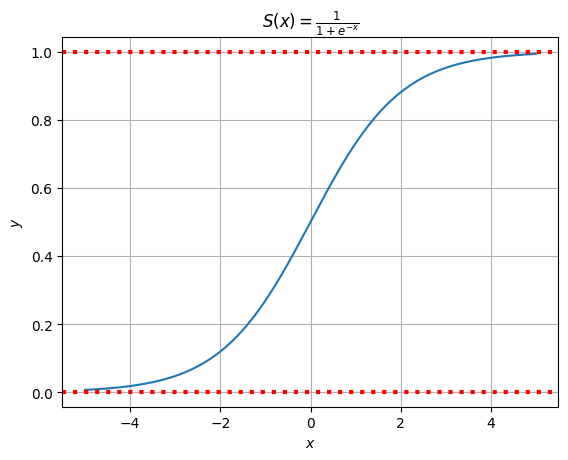

In [3]:
x = np.arange(-5, 5, .01)
plt.plot(x, sigmoid(x))
plt.title(r'$S(x) = \frac{1}{1 + e^{-x}}$')
plt.axhline(1.0, linestyle=":",color='r', label='threshold', linewidth=3)
plt.axhline(0.0, linestyle=":",color='r', label='threshold', linewidth=3)
plt.grid()
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.show()

#### Jak na podstawie prawdopodobieństwa przypisywać obiekty do poszególnych klas?  

Niech klasyfikator przypisze 1 gdy $\sigma(\theta^Tx+\theta_0) \geq 0.5$, a w przeciwnym razie 0. Wartość 0.5 nazywana jest progiem odcięcia (ang. decision boundry, threshold).

#### Co teraz?

Naszym zadaniem jest dobranie takich parametrów $\theta$ by maksymalizować prawdopodobieństwo przypisania poprawnej klasy przez klasyfikator.  
Prawdopodobieństwo: $$\prod_{i=1}^{n} 
\begin{cases} 
g_i & \quad \text{jeśli $y_1=1$}\\ 
1-g_i & \quad \text{w przeciwnym wypadku} 
\end{cases}$$
gdzie $g=\sigma(\theta^Tx+\theta_0)$. Jest to równoważne z $$\prod_{i=1}^{n} g_i^{y_i}(1-g_i)^{1-y_i}$$ 
Jako, że łatwiej będzie nam przedstawić to wyrażnie jako sumę i jako, że logarytm jest funkcją rosnącą, nie ma problemu z zamianą na: $$\sum_{i=1}^{n}(y_i log(g_i) + (1-y_i) log(1-g_i))$$
Jeśli dostawimy na początku znak minus, to będziemy mieli zadanie minimalizacji funkcji straty. W ten sposób otrzymaliśmy entropię krzyżową (ang. cross entropy). Używa się też nazw log loss i negative log-likelihood.

#### Gradient descent - jak znaleźć najlepsze parametry modelu?

![Gradient descent](https://cdn.analyticsvidhya.com/wp-content/uploads/2024/09/631731_P7z2BKhd0R-9uyn9ThDasA.webp "Gradient descent")

Parametry $\Theta$ dobieramy zakładając, że $\Theta \in \mathbb{R}$ oraz zakładając, że znamy $J(\Theta)$ oraz $J^\prime(\Theta)$ względem $\Theta$.

**Pseudokod dla przykładowej funkcji *f*, gdzie $\eta$ to learning rate i $\epsilon$ to mała stała**  
$ 1D\_Gradient\_descent(\Theta_{init}, \eta, f, f^\prime, \epsilon)$  
$\Theta _0 = \Theta_ {init} \\
t = 0 \\
powtarzaj \\
\quad t = t + 1 \\
\quad \Theta _t = \Theta _{t-1} - \eta f^\prime(\Theta _{t-1}) \\
dopóki \mid f(\Theta _t) - f(\Theta _{t-1}) \mid < \epsilon \\
zwróć \ \Theta _t
$ 
  
Algorytm zatrzymuje się, gdy zmiana funkcji *f* jest wystarczająco mała. Są również inne sposoby na ustalenie kiedy zatrzymać działanie algorymtu:  
- zatrzymanie po określonej z góry liczbie iteracji
- zatrzymanie gdy zmiana parametrów jest wystarczająco mała
- zatrzymanie gdy pochodna $f^\prime$ jest wystarczająco mała

##### Odpowiedni dobór learning rate'u
![Learning rate](https://www.jeremyjordan.me/content/images/2018/02/Screen-Shot-2018-02-24-at-11.47.09-AM.png "Learning rate")

Dla m-wymiarowych $\Theta$ mamy:  
$$\large \nabla _{\Theta} J = 
\begin{bmatrix}
\frac{\partial J} {\partial \Theta _1}\\
\vdots \\
\frac{\partial J} {\partial \Theta _m}
\end{bmatrix}$$
Wtedy w algorytmie:
$$\large  \Theta _t = \Theta _{t-1} - \eta \nabla _{\Theta}J(\Theta _{t-1})

![Multidim gradient descent](https://www.quantamagazine.org/wp-content/uploads/2022/01/Gradient-descent.jpg "Multidim gradient descent")

##### Stochastic gradient descent
SGD jest realizowany poprzez wybranie losowego obiektu (lub grupy obiektów) ze zbioru danych, obliczając gradient na ich podstawie i robiąc mały kroku w przeciwnym kierunku do kierunku gradientu. Wykonujemy te operacje wiele razy.  
  
Oznacza to, że za każdym razem trochę zmieniamy nasz model by dawał lepsze wyniki dla tego losowego obiektu, licząc, że dzięki temu nasz model będzie działał dobrze dla całego zbioru.

![Gradient descent variations](https://editor.analyticsvidhya.com/uploads/58182variations_comparison.png "Gradient descent variations")

#### Wykorzystanie

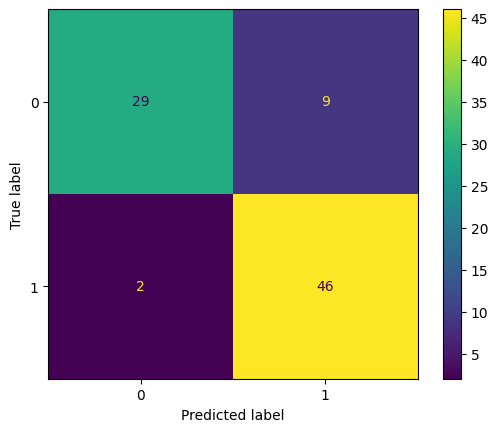

In [4]:
# load the dataset
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

# test the classifier
clf = SGDClassifier(loss='log_loss', penalty='l2', random_state=12)

# train
clf.fit(X_train, y_train)

# test
y_pred = clf.predict(X_test)

# results
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Zadanie dla chętnych

Zbadaj wpływ regularyzacji na wyniki klasyfikatora. Sprawdź dostępne sposoby na zmianę parametrów dla SGDClassifier z sklearna.

### Support Vector Machine

#### Decision boundry

SVM tworzy hiperpłaszczyznę w wielowymiarowej przestrzeni na podstawie, której można dokonać klasyfikacji. Intuicyjnie dobrą separację osiąga hiperpłaszczyzna, która ma największą odległość do najbliższych punktów danych uczących dowolnej klasy, ponieważ generalnie im większy margines, tym mniejszy błąd uogólnienia klasyfikatora.

![Decision boundry](https://editor.analyticsvidhya.com/uploads/13379svm15.png "Decision boundry")

#### Kernel

Kernel odgrywa istotną rolę w klasyfikacji i służy do transformacji danych, które mogą nie być liniowe separowalne w oryginalnej formie. Najpopularniejsze kernele to:
- liniowy
- wielomianowy
- gaussian radial basis function
- sigmoida

![Kernel](https://www.statsoft.pl/textbook/graphics/SVMIntro3.gif "Kernel")

![image](https://machine-learning-note.readthedocs.io/en/latest/_images/svm_kernel_trick.png)

#### Funkcja straty

Nasze zadanie polega na minimalizacji: 
$$ \frac {1} {2} w^T w + C \sum_{i=1}^{n} \zeta _i $$ 
pod warunkiem, że:
$$ y_i(w^T \phi(x_i)+b) \geq 1-\zeta _i \quad i \quad \zeta _i \geq 0$$
W tym wypadku $y_i \in \{-1, +1\}$ 

Minimalizacja $ w^T w $ odpowiada za maksymalizację odległości między obiektami i hiperpłaszczyzną. Drugi składnik funkcji straty odpowiada za błędnie zakwalifikowane obiekty. Chcielibyśmy, żeby $ y_i(w^T \phi(x_i)+b) \geq 1$ było prawdziwe dla wszystkich obiektów, bo to oznacza, że mamy bezbłędną klasyfikację. Niestety nie zawsze jest to możliwe, dlatego pozwalamy by niektóre obiekty były były oddalone o $\zeta _i$ od właściwego marginesu. Stała $C$ kontroluje z jaką siłą karzemy za błędy.

#### Wykorzystanie

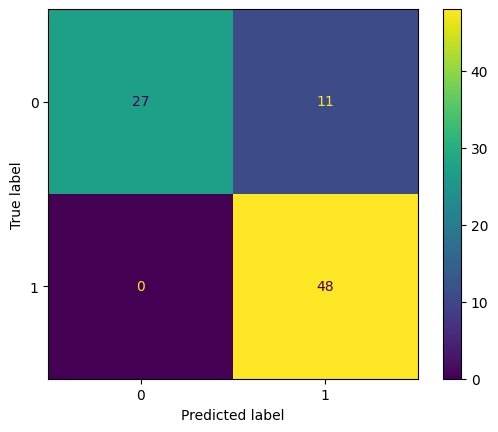

In [5]:
# load the dataset
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

# test the classifier
clf = SVC()

# train
clf.fit(X_train, y_train)

# test
y_pred = clf.predict(X_test)

# results
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Zadanie dla chętnych

Z jakim kernelem działa domyślnie klasyfikator SVC z biblioteki sklearn? Sprawdź wyniki klasyfkiacji dla innych dostępnych kerneli.

### Macierz pomyłek (ang. confusion matrix)

![Confusion_matrix](https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png "Confusion matrix")

## Klasyfikacja wieloklasowa

### Klasyfikator *k* najbliższych sąsiadów (ang. K-NearestNeighbors)
 

W tym modelu w czasie treningu tylko zapamiętujemy dane. Podczas testowania znajdujemy *k* najbardziej podobnych obiektów do obiektu, którego klasę chcemy poznać. Wybrane obiekty "głosują", do której klasy powinien on należeć.

#### Wizualizacja przynależności do klasy

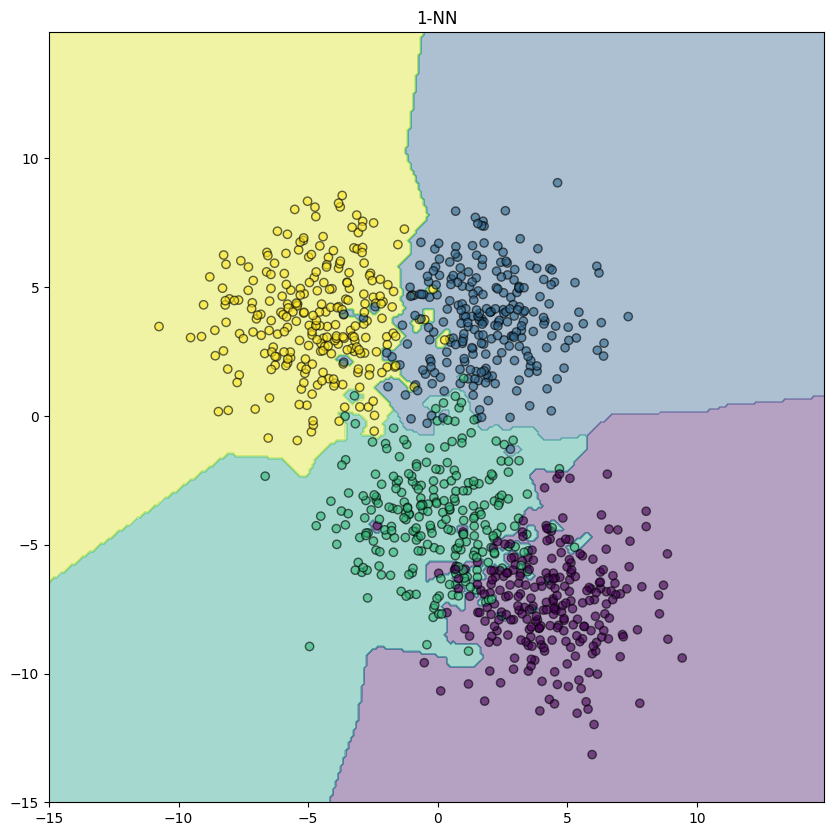

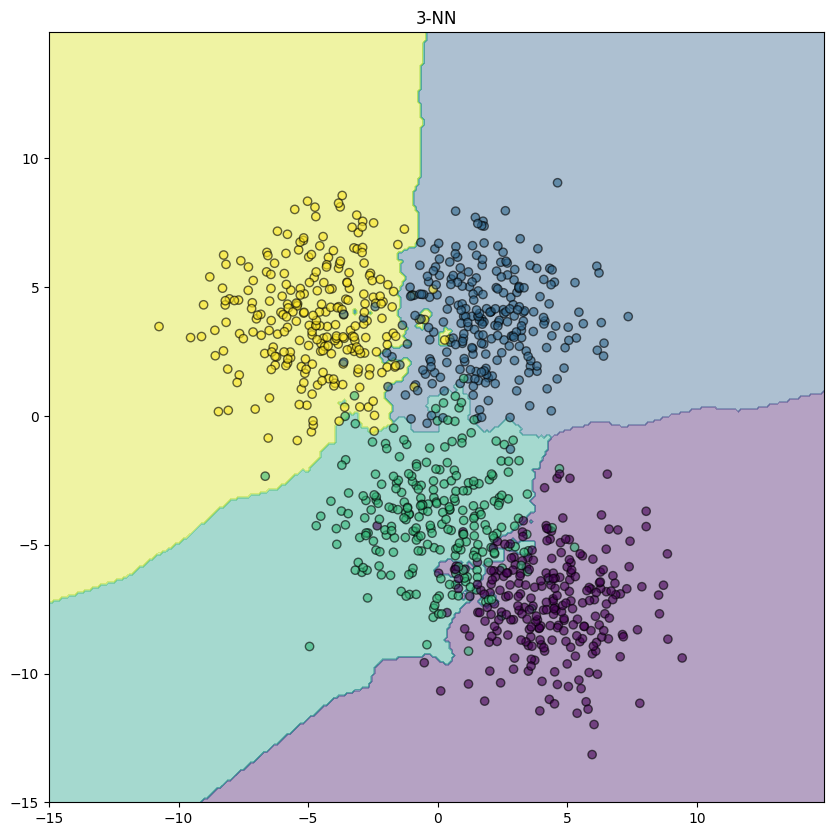

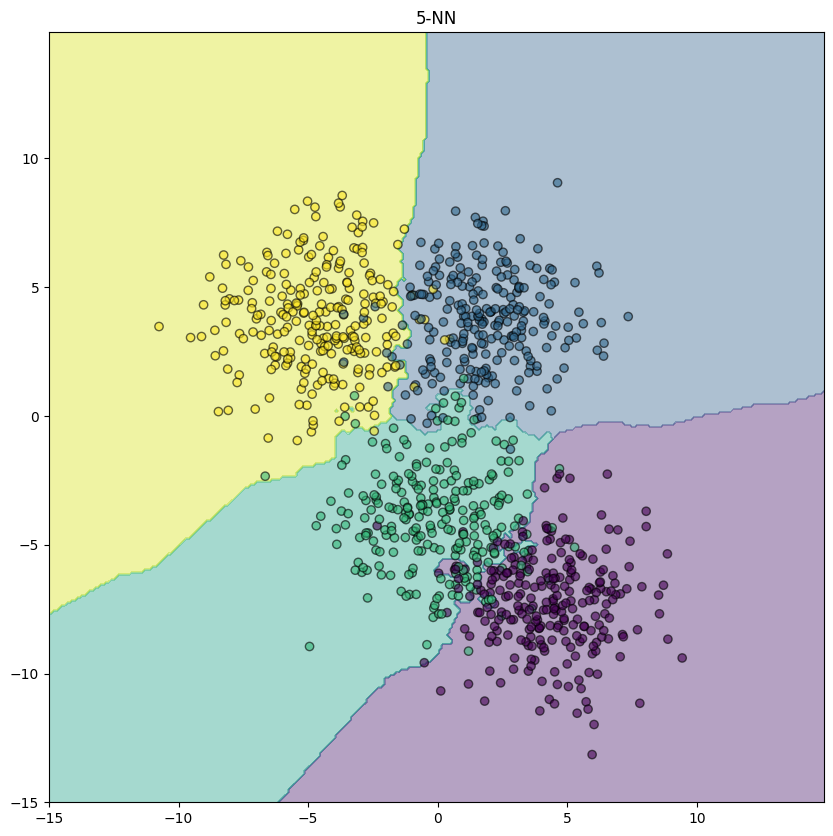

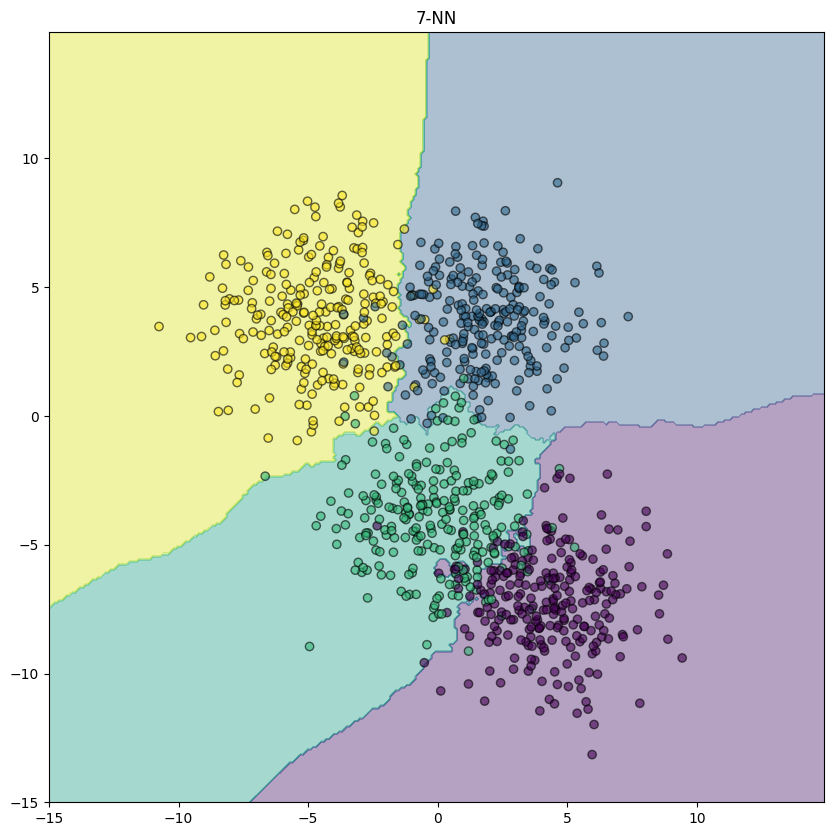

In [6]:
# syntetyczny zbiór danych
X, y = datasets.make_blobs(n_samples=1000,
                  n_features=2,
                  centers=4,
                  cluster_std=2,
                  center_box=(-7.5, 7.5),
                  shuffle=True,    
                  random_state=10)

for k in [1, 3, 5, 7]:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X, y)

    xx, yy = np.meshgrid(np.arange(-15, 15, 0.1),
                         np.arange(-15, 15, 0.1))

    # Create a plot with subplots
    fig, ax = plt.subplots(figsize=(10, 10))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4)
    ax.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', alpha=0.6)
    ax.set_title(f"{k}-NN")

    plt.show()

#### Jak dobrać *k*?

(1000, 2)


Text(0, 0.5, 'Prawdopodobieństwo błędu')

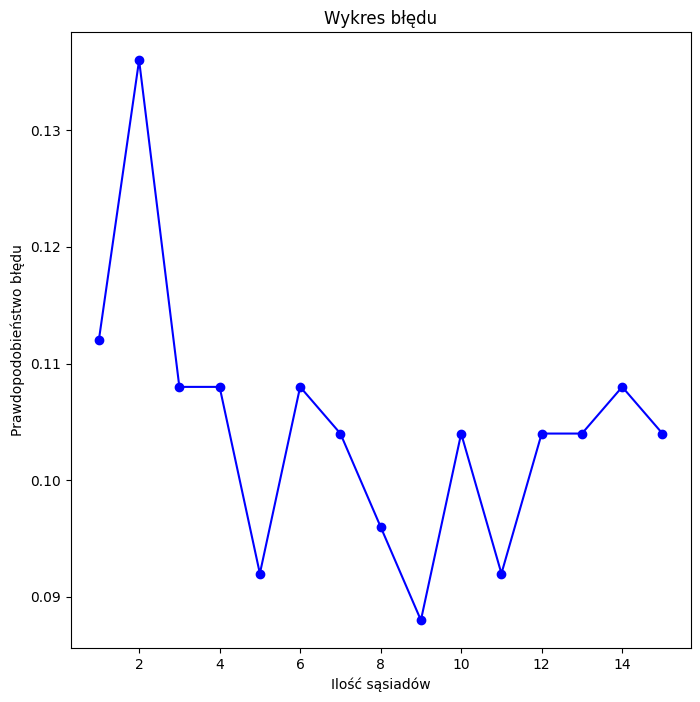

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)
print(X.shape)

k_vals = range(1, 16)
results = np.zeros(15)
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train,y_train)
    results[k-1] = 1 - model.score(X_test, y_test)

plt.figure(figsize=(8,8))
plt.plot(k_vals, results,'bo-')
plt.title('Wykres błędu')
plt.xlabel('Ilość sąsiadów')
plt.ylabel('Prawdopodobieństwo błędu')

#### Zadanie dla chętnych

Przeczytaj o walidacji krzyżowej i wykorzystają ją do doboru optymalnego *k*. Czy najlepsze *k* będzie takie samo jak w przykładzie wyżej?

### Naiwny klasyfikator Bayesa

Model szuka klasy $y \in Y$, która ma największe prawdopodobieństwa na wystąpienie przy wektorze cech $x_1...x_k$, czyli  $$\max_{y} P(y|x_1 ... x_k)$$
By móc zastosować to równanie w praktyce musimy wykorzystać twierdzenie Bayesa.

#### Twierdzenie Bayesa

$$\Large P(y|x_1...x_k) = \frac{P(y)P(x_1...x_k|y)}{P(x_1...x_k)}$$

#### Czemu naiwny?

Naiwny, bo zakładamy, że atrybuty obiektu są niezależne. Wtedy otrzymujemy:
$$\Large P(y|x_1...x_k) = \frac{P(y) \prod_{i=1}^{k} P(x_i|y)}{P(x_1...x_k)}$$

Możemy też zauważyć, że $P(x_1...x_k)$ jest stałą, dlatego po uproszczeniu otrzymujemy:
$$\Large P(y|x_1...x_k) = P(y) \prod_{i=1}^{k} P(x_i|y)$$

Jako $P(y)$ weźmiemy częstotliwość występowania klasy y w zbiorze treningowym. $P(x_i|y)$ możemy modelować różnymi rozkładami, np. krzywą Gaussa: $$P(x_i|y)= \frac{1}{\sqrt{2 \pi \sigma_y^2}} exp(-\frac {({x_i-\mu_y})^2} {2\sigma_y^2})$$

#### Wykorzystanie

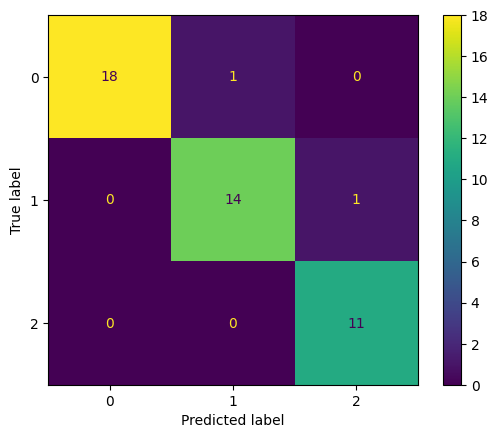

In [8]:
# load the dataset
bc = datasets.load_wine()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# test the classifier
clf = GaussianNB()

# train
clf.fit(X_train, y_train)

# test
y_pred = clf.predict(X_test)

# results
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Zadanie dla chętnych

Przeczytaj o wyliczaniu metryk (accuracy, recall, precision) w klasyfikacji wieloklasowej. Porównaj wyniki dla syntetycznego zbioru danych i naiwnego klasyfikatora Bayesa, wykorzystując micro averaging i macro averaging.

### Drzewa decyzyjne (ang. decision trees)

#### Struktura

![Decision tree](https://dataaspirant.com/wp-content/uploads/2017/01/B03905_05_01-compressor.png "Decision tree")

#### Algorytm działania

Załóżmy, że jesteśmy w węźle $m$ i mamy w nim zbiór danych $Q_m$ z $n_m$ próbkami. Musimy rozważyć wszystkie możliwości podziału danych $ \theta(j, t_m)$, gdzie $j$ oznacza atrybut a $t_m$ próg. $\theta(j, t_m)$ dzieli zbiór na
$$ Q _m ^{left} (\theta) = \{ (x, y) | x_j \leq t_m\} \\
Q _m ^{right} (\theta) = Q_m \setminus Q _m ^{left} (\theta)
$$

Podział wybierany jest na podstawie:
$$ G(Q_m, \theta) = \frac {n_m ^{left}} {n_m} H(Q_m ^{left}(\theta))+\frac {n_m ^{right}} {n_m} H(Q_m ^{right}(\theta))$$
gdzie H to zazwyczaj:
 - Gini impurity $H(Q_m) = \sum _k p_{mk}(1-p_{mk})$
 - entropia / log loss $H(Q_m) = - \sum _k p_{mk}log(p_{mk})$

![Entropy vs Gini impurity](https://miro.medium.com/v2/resize:fit:828/format:webp/1*jTsdB6oHeDfSz4F7cpHl-Q.png "Entropy vs Gini impurity")

#### Wykorzystanie

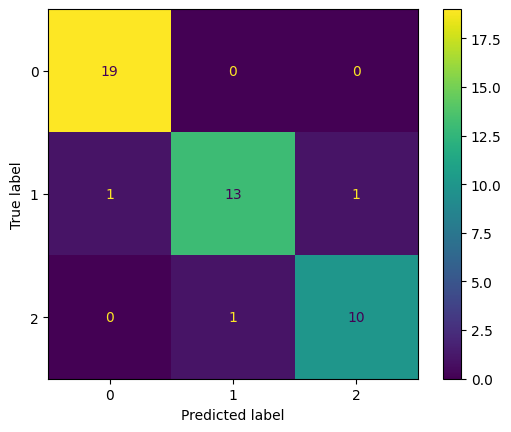

In [9]:
# load the dataset
bc = datasets.load_wine()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

# test the classifier
clf = DecisionTreeClassifier()

# train
clf.fit(X_train, y_train)

# test
y_pred = clf.predict(X_test)

# results
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### Zadanie dla chętnych

Sprawdź, czym są lasy losowe i jakie mają powiązanie z drzewami decyzyjnymi. Porównaj wynik lasu losowego do wyniku drzewa decyzyjnego.

## Bagging vs Boosting

![image](https://images.shiksha.com/mediadata/ugcDocuments/images/wordpressImages/2023_08_Difference-Between-Bagging-Boosting.jpg)

De facto SOTA danych tabularycznych -> XGBoost!

![image](https://lh5.googleusercontent.com/FXleCMB0BJuKIJ83Uxs3j7wm9U6aF8IVeKrIMcgPybliq4BIS9B4aZ9_b9tzvzTM2EXvDGfqiW5xSn25JL5k42QzxcifZS0Jks-dAV-yiUtN8Oik0eM3A07qL6Zot4Qk8uwywOJvRovxIH-Ieg)

## Czy lepsze metryki == lepszy model?
Nie zawsze, czyli o Spurious Correlations słów kilka

Wykorzystanie XAI w celu wykrywania potencjalnych Spurious Correlations -> Local Interpretable Model-agnostic Explanations (LIME)

![image.png](https://www.researchgate.net/publication/361220433/figure/fig19/AS:11431281127203341@1678969525654/7-Left-Husky-Classified-as-Wolf-Right-Explanation-of-the-Models-Prediction-in-the.png)

Nie zawsze łatwe do rozpoznania.
Nie tylko markery mogą wskazywać na klasę, np. projection AP vs PA

![image](https://www.researchgate.net/publication/308006490/figure/fig2/AS:405477532946444@1473684785941/Subsequent-chest-X-ray-with-a-radiopaque-side-marker.png)

Model do rozpoznawania raka w płucach, Atencja blisko rozrusznika serca + ramienia, oraz na sercu

![image](https://schaudhuri16.github.io/LungCancerDetection/images/image24.png)

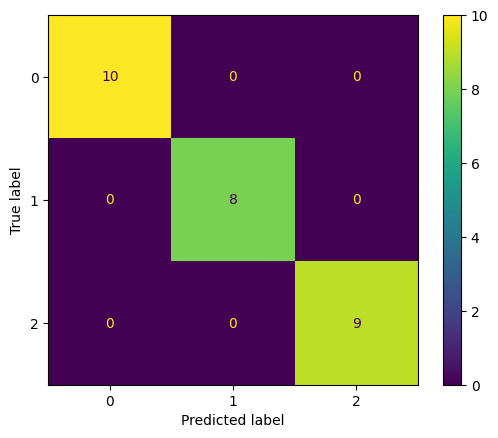

In [10]:
from numpy import loadtxt
from xgboost import XGBClassifier, plot_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
bc = datasets.load_wine()
X, y = bc.data, bc.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=12)

# test the classifier
clf = XGBClassifier()
# train
clf.fit(X_train, y_train)
clf.get_booster().feature_names = bc.feature_names

# test
y_pred = clf.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

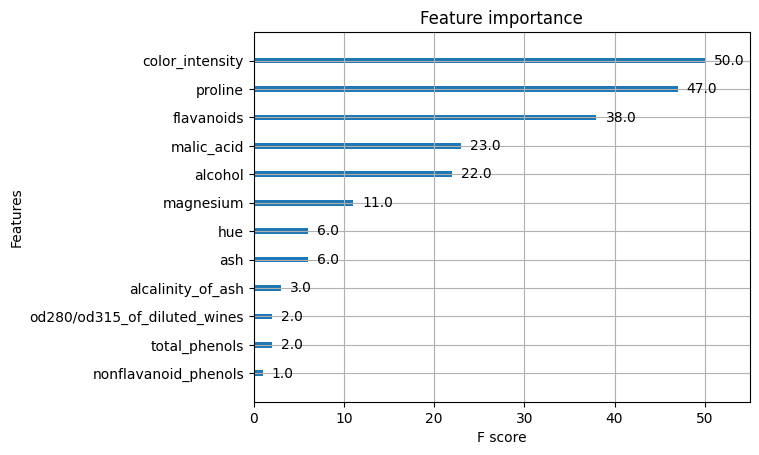

In [11]:
plot_importance(clf)
